### transforms

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

* dataloader의 인자로 들어갈 transform을 미리 정의가능
* Compose를 통해 리스트 안에 순서대로 전처리 진행
* ToTensor()은 torchvision이 PIL image 형태로만 입력을 받기 때문에 데이터 처리를 위해 Tensor형으로 변환 필요

In [3]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [4]:
trainset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=True,
                          download=False,
                          transform=mnist_transform)

testset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=False,
                          download=False,
                          transform=mnist_transform)

### DataLoader
* DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size 크기만큼 데이터를 가져온다.

In [5]:
train_loader = DataLoader(trainset, batch_size=8,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8,
                         shuffle=False, num_workers=2)

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

* shape: (B, C, H, W)
* 즉, 28*28 흑백(Channel=1)이미지가 8장있다는 뜻

In [7]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

* images[0]의 shape: (1,28,28)

In [8]:
torch.randint(200, size=(1,)).item()

115

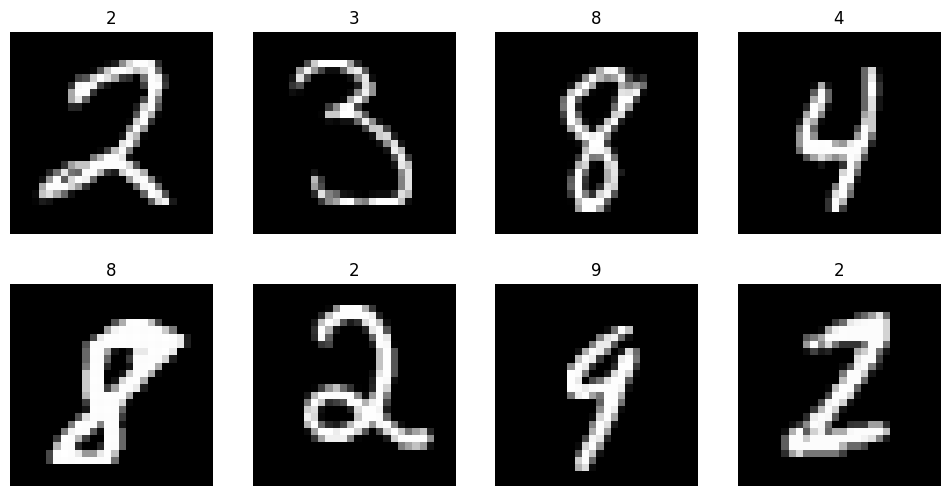

In [9]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 신경망 구성
* 레이어(layer)
* 모듈(module): 한 개 이상의 레이어가 모여서 구성
* 모델(model): 한 개 이상의 모듈이 모여서 구성

In [10]:
import torch.nn as nn

### Linear 계층

In [11]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
    # 입력 피처 수, 출력 피처 수
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-1.7059e+00,  1.5555e+00,  1.2066e-01,  ...,  1.2432e+00,
         -7.7447e-01, -1.1305e+00],
        [-1.5203e+00,  1.6409e-01,  3.1092e-02,  ..., -1.0897e+00,
         -1.7260e+00, -6.4786e-01],
        [-4.8407e-01,  8.2133e-01, -2.2948e-01,  ...,  2.4540e-01,
         -2.6013e-01,  1.1208e+00],
        ...,
        [ 8.0907e-01,  5.9586e-01, -2.3108e+00,  ...,  1.7157e+00,
          5.8441e-01, -1.4506e+00],
        [-1.3590e+00,  1.7146e+00, -1.1419e-01,  ..., -3.7819e-01,
          3.8042e-02,  4.2145e-04],
        [-6.1352e-01,  1.2838e+00,  7.5407e-01,  ..., -4.3586e-01,
          1.0700e+00, -1.0942e+00]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.7481,  0.4431, -0.9769,  ...,  0.0483, -0.1227, -0.8420],
        [-0.1150, -0.2110, -0.7076,  ...,  0.8830, -0.7841, -0.0308],
        [-0.6025,  0.8807, -0.3287,  ..., -0.6465, -0.6332, -0.0689],
        ...,
        [-1.4539,  0.4757, -0.2855,  ..., -0.3788, -0.3172, -0.3714],
        [ 0.3785,  0.446

### Conv2d 계층

In [12]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [13]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1),
               padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [14]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어 자세히 보기

In [15]:
nn.Conv2d(in_channels=1,
          out_channels=20,
          kernel_size=5,
          stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [16]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [17]:
weight = layer.weight
print(weight.shape)

torch.Size([20, 1, 5, 5])


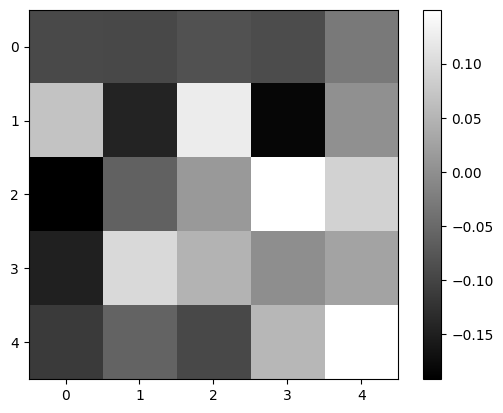

In [18]:
plt.imshow(weight[0, 0, :, :].detach().numpy(),
            'grey')
plt.colorbar()
plt.show()

In [19]:
print(images.shape)
print(images[0].shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [25]:
print(images[0].shape)
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.shape)

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

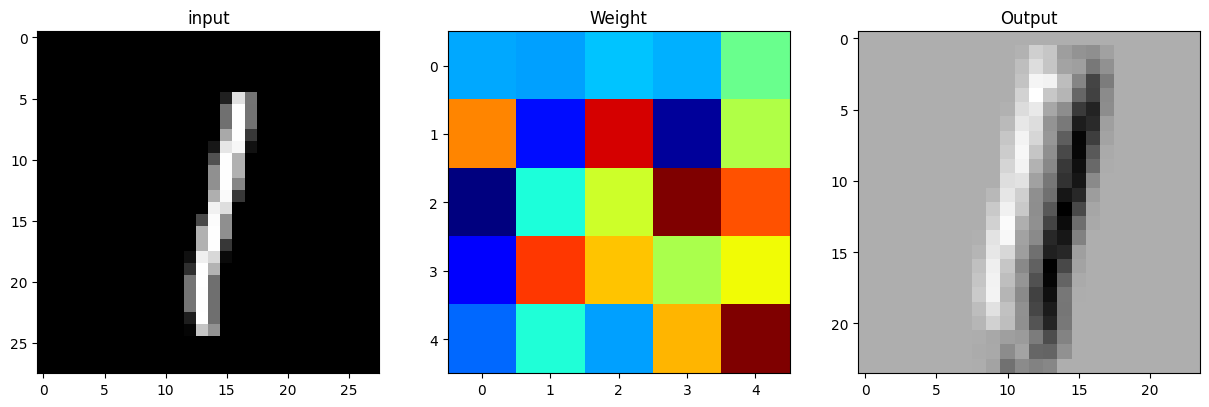

In [28]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'grey')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:].detach().numpy(), 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'grey')

### 풀링 레이어

In [35]:
pool = nn.MaxPool2d(2, 2)
pooled = pool(output)
pooled.shape

torch.Size([1, 20, 12, 12])

In [36]:
pool_arr = pooled.numpy()
pool_arr.shape

(1, 20, 12, 12)

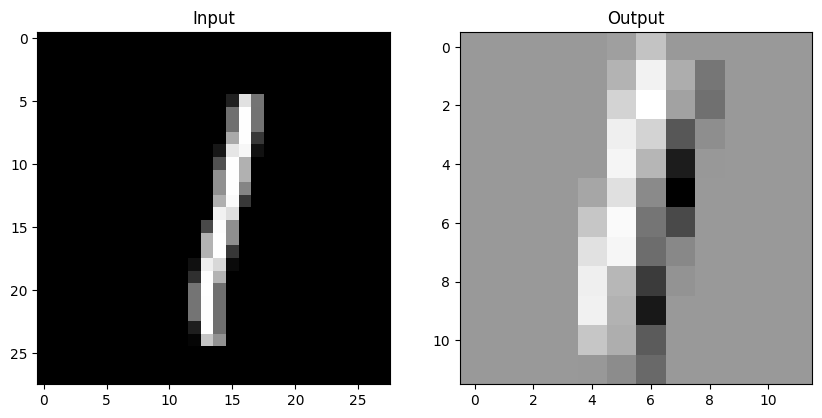

In [38]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

### Dense 층

In [39]:
flatten = input_image.view(-1, 28*28)
flatten.shape

torch.Size([1, 784])

In [40]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

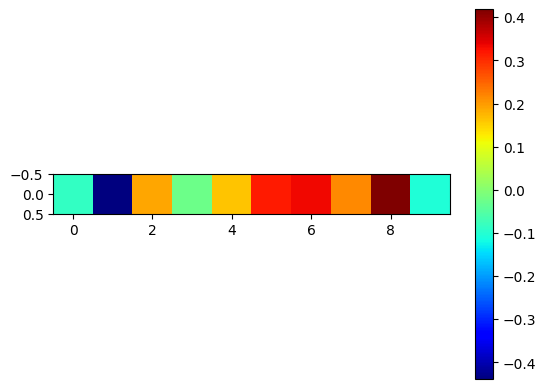

In [41]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 함수

In [44]:
with torch.no_grad():
    flatten = input_image.view(-1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = nn.Softmax(dim=1)
    soft = softmax(lin)

print(soft)
print(soft.sum())

tensor([[0.0864, 0.0919, 0.1166, 0.0815, 0.1158, 0.1021, 0.0920, 0.0671, 0.1217,
         0.1250]])
tensor(1.0000)


In [45]:
inputs = torch.randn(4,3,28,28).to('cuda')
inputs.shape

torch.Size([4, 3, 28, 28])

In [46]:
layer = nn.Conv2d(3,20,5,1).to('cuda')
ReLU = nn.ReLU()
output = ReLU(inputs)
output.shape

torch.Size([4, 3, 28, 28])